# 매매가격지수 데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
df_i = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\한국부동산원_아파트 매매가격지수(월별, 규모별)_20201014.csv', encoding = 'cp949') 
df_p = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\한국부동산원_아파트 평균매매가격(월별)_20201029.csv', encoding = 'cp949')

## 전처리

In [3]:
pd.options.display.max_columns = 25
df_i.head(2)

,지역 및 규모,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,전국 /40㎡이하,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.543989,94.452203,94.695685,94.608182,94.570657,94.924834,95.021443,94.976008,95.348703,95.813348,96.035571,96.093772
1,전국 /40㎡초과 ~ 60㎡이하,89.066007,89.181306,89.351083,89.437508,89.406334,89.255803,88.964926,88.740966,88.581878,88.457188,88.356604,...,95.490715,95.571127,95.924112,96.131995,96.458845,97.067226,97.296164,97.384525,97.750979,98.434306,98.899605,99.313357


In [4]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Columns: 106 entries, 지역 및 규모 to 2020-09
dtypes: float64(104), int64(1), object(1)
memory usage: 203.8+ KB


In [5]:
df_i_melt = df_i.melt(id_vars='지역 및 규모', var_name='기간', value_name = '매매가격지수').copy()
df_i_melt.head(10)

,지역 및 규모,기간,매매가격지수
0,전국 /40㎡이하,2012-01,NaN
1,전국 /40㎡초과 ~ 60㎡이하,2012-01,89.066007
2,전국 /60㎡초과 ~ 85㎡이하,2012-01,93.025407
3,전국 /85㎡초과 ~ 102㎡이하,2012-01,97.969171
4,전국 /102㎡초과 ~ 135㎡이하,2012-01,100.087735
5,전국 /135㎡초과,2012-01,105.536222
6,수도권 /40㎡이하,2012-01,NaN
7,수도권 /40㎡초과 ~ 60㎡이하,2012-01,87.680620
8,수도권 /60㎡초과 ~ 85㎡이하,2012-01,94.288892
9,수도권 /85㎡초과 ~ 102㎡이하,2012-01,98.991379


In [6]:
# 지역 및 규모를 지역, 규모 칼럼으로 분리한다.
site = '전국 /40㎡이하~60㎡초과'

def parse_local(site):
    local = site.split(' ')[0].replace(' ','')
    local = str(local)
    return local

def parse_size(site):
    size = site.split('/')[1].replace('초과','-').replace('이하','').replace('~','').replace(' ','')
    size = str(size)
    return size

In [7]:
date = '2012-1'
date.split('-')[0]

'2012'

In [8]:

# def parse_year(date):
#     year = date.split('-')[0]
#     year = int(year)
#     return year

# def parse_month(date):
#     month = date.split('-')[1]
#     month = int(month)
#     return month

# parse_year(date)

In [9]:
df_i_melt['지역명'] = df_i_melt['지역 및 규모'].apply(parse_local)
df_i_melt['전용면적'] = df_i_melt['지역 및 규모'].apply(parse_size)
# df_i_melt['날짜'] = df_i_melt['기간'].apply(parse_year)
# df_i_melt['월'] = df_i_melt['기간'].apply(parse_month)

In [10]:
df_i_melt = df_i_melt.drop(['지역 및 규모'], axis=1)

In [11]:
df_i_melt.columns.to_list()

['기간', '매매가격지수', '지역명', '전용면적']

## 매매가격지수 전처리 완료된 데이터

In [12]:
df_i_prepare = df_i_melt[(df_i_melt['매매가격지수'].notnull()) & (df_i_melt['지역명'] != '전국') 
                         & (df_i_melt['지역명'] != '수도권') & (df_i_melt['지역명'] != '지방권')
                        & (df_i_melt['지역명'] != '6대광역시') & (df_i_melt['지역명'] != '5대광역시')
                        & (df_i_melt['지역명'] != '9개도') & (df_i_melt['지역명'] != '8개도')]
df_i_prepare

,기간,매매가격지수,지역명,전용면적
43,2012-01,86.476065,서울,40㎡-60㎡
44,2012-01,92.831743,서울,60㎡-85㎡
45,2012-01,92.974395,서울,85㎡-102㎡
46,2012-01,101.971484,서울,102㎡-135㎡
47,2012-01,107.671253,서울,135㎡-
...,...,...,...,...
25824,2020-09,87.282447,제주,40㎡
25825,2020-09,90.577891,제주,40㎡-60㎡
25826,2020-09,93.136589,제주,60㎡-85㎡
25827,2020-09,89.814254,제주,85㎡-102㎡


# 분양가격 데이터

## 과거 데이터 전처리

In [13]:
df_first = pd.read_csv(r"C:\Users\pjk\Documents\Data_set\Jupyter_data\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", 
                       encoding="cp949")
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [14]:
df_first_melt = df_first.melt(id_vars = '지역',var_name = '기간', value_name = '평당분양가격').copy()

In [15]:
df_first_melt.head(1)

,지역,기간,평당분양가격
0,서울,2013년12월,18189


In [16]:
df_first_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   기간      357 non-null    object
 2   평당분양가격  357 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.5+ KB


In [17]:
df_first_melt.isnull().sum()

지역        0
기간        0
평당분양가격    0
dtype: int64

In [18]:
date = '2014년1월'

def parse_range(date):
    year = date.split('년')[0] + '-' + date.split('년')[1].replace('월','')
    year = str(year)
    return year

parse_range(date)

'2014-1'

In [19]:
df_first_melt['기간'] = df_first_melt['기간'].apply(parse_range)
# df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt['지역명'] = df_first_melt['지역']

In [20]:
df_first = df_first_melt.drop(['지역'], axis=1)

## 과거 데이터 전처리 완료

In [21]:
df_first

,기간,평당분양가격,지역명
0,2013-12,18189,서울
1,2013-12,8111,부산
2,2013-12,8080,대구
3,2013-12,10204,인천
4,2013-12,6098,광주
...,...,...,...
352,2015-8,6580,전북
353,2015-8,6289,전남
354,2015-8,7037,경북
355,2015-8,7665,경남


## 최근 데이터 전처리

In [79]:
df_last = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv', encoding = 'cp949')

In [80]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [81]:
df_last.info()
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4675 non-null   object
 1   규모구분     4675 non-null   object
 2   연도       4675 non-null   int64 
 3   월        4675 non-null   int64 
 4   분양가격(㎡)  4346 non-null   object
dtypes: int64(2), object(3)
memory usage: 182.7+ KB


In [82]:
df_last = df_last[df_last['분양가격'].notnull()]
df_last['평당분양가격'] = df_last['분양가격']*3.3

In [83]:
df_last = df_last.drop(['분양가격(㎡)','분양가격'], axis = 1)

In [84]:
df_last.value_counts()

지역명  규모구분              연도    월   평당분양가격 
충북   전체                2020  4   7920.0     1
대구   전용면적 60㎡초과 85㎡이하  2018  12  12929.4    1
                       2020  2   14579.4    1
                             1   14576.1    1
                       2019  12  14411.1    1
                                           ..
인천   전용면적 60㎡초과 85㎡이하  2018  7   11672.1    1
                             6   11672.1    1
                             5   11771.1    1
                             4   11378.4    1
강원   전용면적 102㎡초과       2015  10  7164.3     1
Length: 4330, dtype: int64

In [86]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "-")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,19410.6,60㎡-85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,18879.3,85㎡-102㎡
4,서울,전용면적 102㎡초과,2015,10,19400.7,102㎡-
...,...,...,...,...,...,...
4667,경남,전용면적 60㎡초과 85㎡이하,2020,4,10424.7,60㎡-85㎡
4668,경남,전용면적 85㎡초과 102㎡이하,2020,4,10711.8,85㎡-102㎡
4670,제주,전체,2020,4,13480.5,전체
4671,제주,전용면적 60㎡이하,2020,4,13328.7,60㎡


## 연도 열 과  월 열의 내용 합치기

In [29]:
# cols = ['연도', '월']
# df_last['기간'] = df_last[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [30]:
df_last = df_last.drop(['연도', '월'], axis=1)

,지역명,기간,평당분양가격
0,서울,2015-10,19275.3


In [45]:
df_ntotal.head(1)

,지역명,기간,평당분양가격,전용면적
1,서울,2015-10,18651.6,60㎡


# 데이터 합치기

## concat 과거 분양가 + 최근 분양가

In [73]:
df_concat = pd.concat([df_first, df_total])
df_concat

,기간,평당분양가격,지역명
0,2013-12,18189.0,서울
1,2013-12,8111.0,부산
2,2013-12,8080.0,대구
3,2013-12,10204.0,인천
4,2013-12,6098.0,광주
...,...,...,...
4650,2020-4,8259.9,전북
4655,2020-4,8550.3,전남
4660,2020-4,8807.7,경북
4665,2020-4,10404.9,경남


<AxesSubplot:xlabel='기간'>

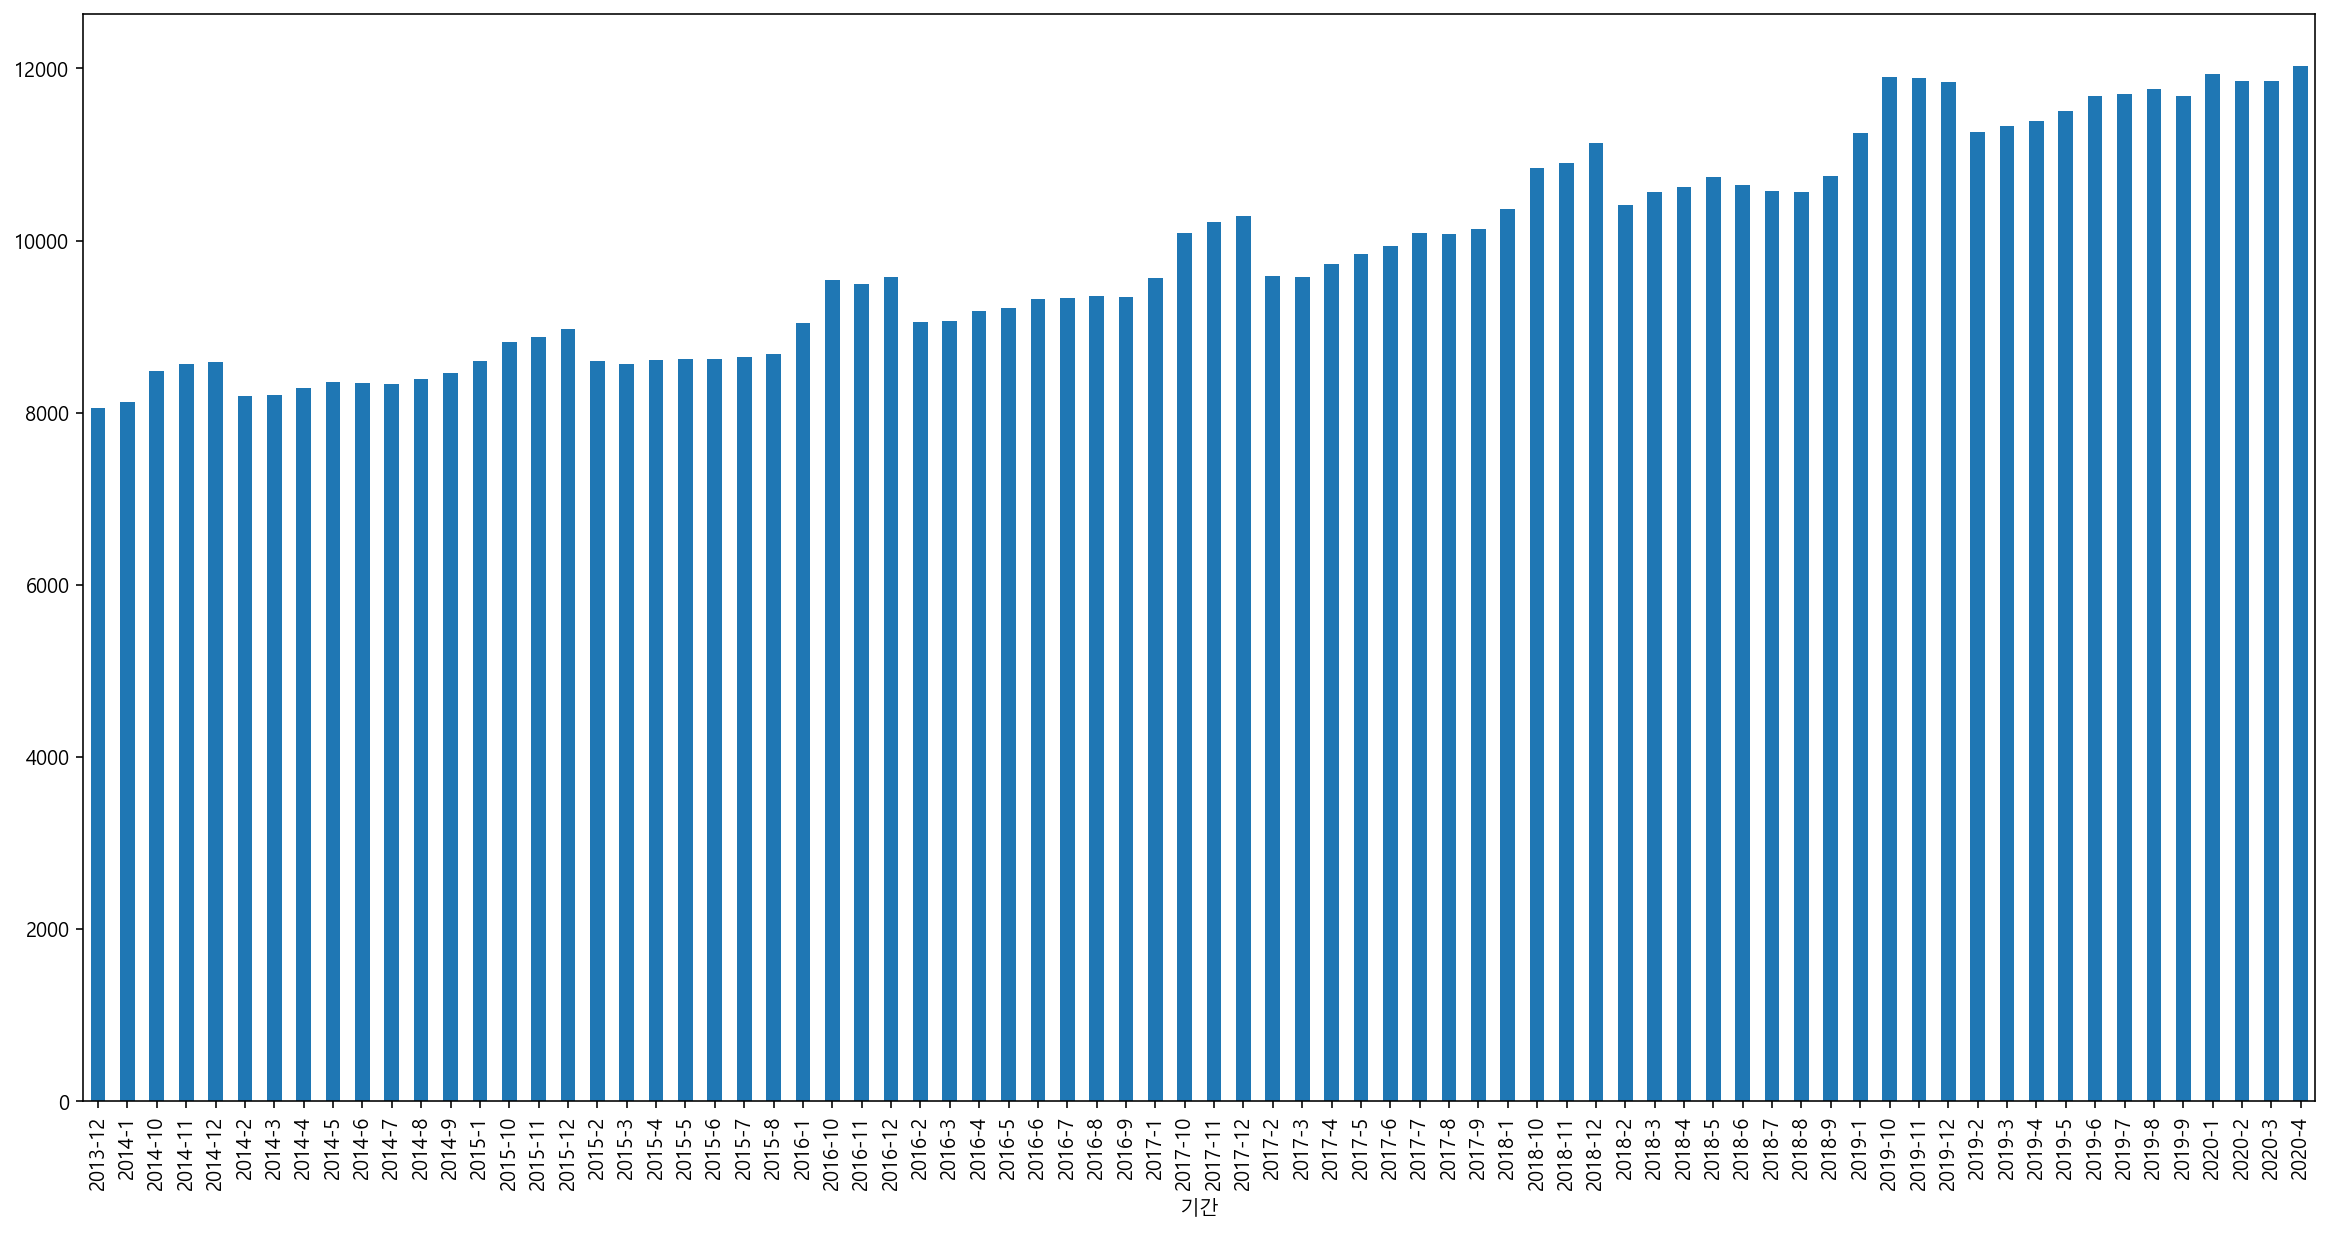

In [77]:
g = df_concat.groupby(['기간'])['평당분양가격'].mean()
g.plot.bar(figsize = (20,10))

In [48]:
df_concat

,기간,평당분양가격,지역명
0,2013-12,18189.0,서울
1,2013-12,8111.0,부산
2,2013-12,8080.0,대구
3,2013-12,10204.0,인천
4,2013-12,6098.0,광주
...,...,...,...
4650,2020-4,8259.9,전북
4655,2020-4,8550.3,전남
4660,2020-4,8807.7,경북
4665,2020-4,10404.9,경남


# 시각화

## matplotlib

## seaborn